# Sentiment Analysis - Hotel Reviews
    By Oghosa Igbinakenzua
    MIE 451 | Decision Support Systems
    November 18, 2017
    
This project involves performing analysis of real hotel review data crawled from the Tripadvisor website to automatically identify positive and negative keywords and phrases associated with hotels and to better understand characteristics of data analysis tools, extracting explanatory review summaries, and human reviewing behavior.

In [2]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oghosa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oghosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\oghosa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oghosa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Anaconda\envs\py35\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews4.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
#hotelDf.reviewColumn = hotelDf.reviewColumn.dropna()
hotelDf.reviewColumn = hotelDf.reviewColumn.fillna("")
#hotelDf = hotelDf.dropna(subset=['reviewColumn'], how='all')

In [4]:
hotelDf

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,531560410,data4\ca\154913\10259142\535933244.html,Element Calgary Airport,I really enjoyed my stay here. The room had a ...,5,positive
1,535933244,data4\ca\154913\10259142\537074672.html,Element Calgary Airport,We stayed one night in this new hotel and it's...,5,positive
2,537074672,data4\ca\154913\10259142\538137131.html,Element Calgary Airport,Stayed at this hotel for business trip purpose...,5,positive
3,538137131,data4\ca\154913\10259142\540014523.html,Element Calgary Airport,Very clean. Modern and bright. GREAT mattress ...,4,positive
4,504192408,data4\ca\154913\10276193\504653214.html,Hilton Garden Inn Calgary Downtown,My partner and I and another couple stayed in ...,4,positive
5,525634624,data4\ca\154913\10276193\525873908.html,Hilton Garden Inn Calgary Downtown,Checked in Sept 7. Nice King room. We unpacked...,2,negative
6,526344941,data4\ca\154913\10276193\526376534.html,Hilton Garden Inn Calgary Downtown,Stayed here for 3 nights. Overall this modern ...,4,positive
7,526376534,data4\ca\154913\10276193\529226007.html,Hilton Garden Inn Calgary Downtown,First time at this hotel and had a very comfor...,4,positive
8,534226299,data4\ca\154913\10276193\534225168.html,Hilton Garden Inn Calgary Downtown,"We had a great stay, clean room and had fun wa...",5,positive
9,534225168,data4\ca\154913\10276193\534447662.html,Hilton Garden Inn Calgary Downtown,Room and amenities were brilliant as was the g...,5,positive


## Q1. Sentiment Analysis and Aggregation

### (1a)  Compute average Vader sentiment and average ground truth rating per hotel.

In [5]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(str(sentence))
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [6]:
reviews = hotelDf['reviewColumn'].as_matrix()

In [7]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|█████████████████████████████████████████████████████████████████████████████| 3611/3611 [00:07<00:00, 509.34it/s]


In [8]:
reviewDF.head()

,reviewCol,vader
0,I really enjoyed my stay here. The room had a ...,0.9701
1,We stayed one night in this new hotel and it's...,0.9939
2,Stayed at this hotel for business trip purpose...,0.9530
3,Very clean. Modern and bright. GREAT mattress ...,0.9090
4,My partner and I and another couple stayed in ...,0.8108


In [9]:
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(reviewDF)
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader
0,Element Calgary Airport,5,positive,I really enjoyed my stay here. The room had a ...,0.9701
1,Element Calgary Airport,5,positive,We stayed one night in this new hotel and it's...,0.9939
2,Element Calgary Airport,5,positive,Stayed at this hotel for business trip purpose...,0.9530
3,Element Calgary Airport,4,positive,Very clean. Modern and bright. GREAT mattress ...,0.9090
4,Hilton Garden Inn Calgary Downtown,4,positive,My partner and I and another couple stayed in ...,0.8108


In [10]:
finaldf.sort_values('vader', ascending = 1)

,hotelName,ratingScore,groundTruth,reviewCol,vader
2646,The Fairmont Palliser,1,negative,"Be careful about your luggage, money and passp...",-0.9963
1195,Canadas Best Value Inn Chinook Station,1,negative,This place is a crap hole!! We originally book...,-0.9862
1681,Sheraton Suites Calgary Eau Claire,1,negative,I just arrived home after a weekend in Calgary...,-0.9858
278,Sandman Hotel Calgary City Centre,2,negative,We made a reservation in May of 2011 for a Jul...,-0.9839
2880,Travelodge Hotel Calgary Macleod Trail,1,negative,As previous guests have said: The lobby was ok...,-0.9801
1909,Econo Lodge South,1,negative,Manager is extremely rude. His name is Ali. He...,-0.9799
2685,Ramada Limited Calgary Northwest,1,negative,"The staff were pleasant, but it seemed like th...",-0.9785
1136,Carriage House Inn,1,negative,This place is so bad. They had a cockroach pro...,-0.9747
1836,Ramada Plaza Calgary Airport Hotel and Confere...,1,negative,I booked this hotel through hotwire.com and it...,-0.9712
1183,Canadas Best Value Inn Chinook Station,1,negative,I booked a room at this revolting hotel during...,-0.9693


In [86]:
#Extract a list of hotels
hotelNames = hotelDf['hotelName'].unique()
# 70 rows => 70 hotels in dataset
hotelDf.groupby(['hotelName']).describe()

idNum                \
                                                    count          mean   
hotelName                                                                 
Acclaim Hotel Calgary Airport                       113.0  2.193975e+08   
Aloft Calgary University                             99.0  3.418719e+08   
Best Western Airport Inn                             12.0  9.454778e+07   
Best Western Plus Calgary Centre Inn                 14.0  3.109982e+08   
Best Western Plus Port O\'Call Hotel                175.0  3.281363e+08   
Best Western Plus Suites Downtown                    20.0  1.496036e+08   
Best Western Plus Village Park Inn                   44.0  2.138915e+08   
Best Western Premier Freeport Inn & Suites           38.0  2.670289e+08   
Calgary Marriott Downtown Hotel                      55.0  5.075610e+08   
Calgary North Thriftlodge                             9.0  2.845965e+08   
Canadas Best Value Inn                                8.0  1.884203e+08   
Canadas Best Value Inn Chinook Station               33.0  1.513350e+08   
Carriage House Inn                                   52.0  3.522637e+08   
Centro Motel                                         19.0  1.969958e+08   
Clarion by Choice Hotel and Conference Centre        33.0  2.238837e+08   
Coast Plaza Hotel & Conference Centre                 8.0  2.239763e+08   
Comfort Inn & Suites Calgary Airport                 26.0  1.932689e+08   
Comfort Inn & Suites South                            7.0  1.326294e+08   
Comfort Inn & Suites University                      24.0  3.396426e+08   
Country Inn & Suites By Carlson, Calgary-Airpor...   80.0  3.401879e+08   
Courtyard by Marriott Calgary Airport                65.0  3.244186e+08   
Days Inn - Calgary South                             48.0  2.116203e+08   
Deerfoot Inn and Casino                              33.0  1.576034e+08   
Delta Calgary South Hotel                            15.0  1.799961e+08   
Delta Hotels Calgary Airport In-Terminal             11.0  4.238353e+08   
Delta Hotels by Marriott Calgary Downtown            92.0  1.875242e+08   
Econo Lodge Inn & Suites University                  12.0  2.043872e+08   
Econo Lodge Motel Village                            10.0  2.011592e+08   
Econo Lodge South                                    18.0  3.845518e+08   
Element Calgary Airport                               4.0  5.356764e+08   
...                                                   ...           ...   
Hotel Alma                                           38.0  2.525055e+08   
Hotel Arts                                          337.0  4.027536e+08   
Hotel Blackfoot                                      90.0  2.367479e+08   
Hotel Elan                                           22.0  4.301043e+08   
Hotel Le Germain Calgary                            218.0  2.696812e+08   
Hyatt Regency Calgary                               132.0  1.998186e+08   
International Hotel and Spa Calgary                 210.0  2.697437e+08   
Radisson Hotel & Conference Centre Calgary Airport   56.0  3.618758e+08   
Ramada Limited Calgary Northwest                     24.0  2.720668e+08   
Ramada Plaza Calgary Airport Hotel and Conferen...   14.0  3.243788e+08   
Ramada Plaza Calgary Downtown                        74.0  1.890143e+08   
Regency Suites Hotel Calgary                         42.0  3.370877e+08   
Residence Inn by Marriott Calgary Airport            38.0  3.578655e+08   
Sandman Hotel & Suites Calgary West                  30.0  1.452120e+08   
Sandman Hotel Calgary Airport                        45.0  1.370614e+08   
Sandman Hotel Calgary City Centre                    90.0  1.785047e+08   
Service Plus Inns & Suites Calgary                   16.0  3.232892e+08   
Sheraton Cavalier Hotel                              13.0  3.176994e+08   
Sheraton Suites Calgary Eau Claire                   31.0  2.431491e+08   
Staybridge Suites Calgary Airport                    20.0  2.194195e+08   
Su

In [12]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
        
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

### (1b) Rank hotels by (i) Average Ground Truth Sentiment (ii) Average Vader Compound Sentiment Score. Show both top-5 and bottom-5 for both ranking methods. Do they agree or are there interesting differences?

In [13]:
hotelRatingDfGt = getHotelRank(finaldf)
print("Top 5 Hotels by Ground truth")
hotelRatingDfGt.head(5)

Top 5 Hotels by Ground truth


,hotelName,avgRatingScore
63,Hotel Elan,4.909091
43,Calgary Marriott Downtown Hotel,4.763636
0,Element Calgary Airport,4.750000
58,Residence Inn by Marriott Calgary Airport,4.710526
9,Hotel Le Germain Calgary,4.655963


In [87]:
hotelVaderRatingDfGt = getHotelRank(finaldf, measure = 'vader' )
print("Top 5 Hotels by vader")
print(hotelVaderRatingDfGt.head(5))
print("Top 15 Hotels by vader")
print(hotelVaderRatingDfGt.head(15))

Top 5 Hotels by vader
                                    hotelName  avgRatingScore
28                    Sheraton Cavalier Hotel        0.962738
0                     Element Calgary Airport        0.956500
58  Residence Inn by Marriott Calgary Airport        0.943847
57           Wingate by Wyndham Calgary South        0.939400
19                            Hotel Blackfoot        0.926029
Top 15 Hotels by vader
                                      hotelName  avgRatingScore
28                      Sheraton Cavalier Hotel        0.962738
0                       Element Calgary Airport        0.956500
58    Residence Inn by Marriott Calgary Airport        0.943847
57             Wingate by Wyndham Calgary South        0.939400
19                              Hotel Blackfoot        0.926029
2    Homewood Suites by Hilton Calgary Downtown        0.924918
59        Courtyard by Marriott Calgary Airport        0.914185
25                     Aloft Calgary University        0.896141
63     

In [91]:
print("Bottom 5 Hotels by Ground truth")
hotelRatingDfGt.tail(5).sort_values(by = "avgRatingScore")

Bottom 5 Hotels by Ground truth


,hotelName,avgRatingScore
45,Ramada Limited Calgary Northwest,1.541667
51,Travelodge Hotel Calgary Macleod Trail,1.612903
50,Travelodge Hotel Calgary International Airport...,2.109091
46,Super 8 Village Calgary AB,2.416667
24,Canadas Best Value Inn Chinook Station,2.484848


In [92]:
print("Bottom 5 Hotels by vader")
print(hotelVaderRatingDfGt.tail(5).sort_values(by = "avgRatingScore"))
print("Bottom 10 Hotels by vader")
print(hotelVaderRatingDfGt.tail(10).sort_values(by = "avgRatingScore"))

Bottom 5 Hotels by vader
                                            hotelName  avgRatingScore
51             Travelodge Hotel Calgary Macleod Trail       -0.131458
45                   Ramada Limited Calgary Northwest       -0.127771
21              Coast Plaza Hotel & Conference Centre        0.114662
34  Ramada Plaza Calgary Airport Hotel and Confere...        0.152400
46                         Super 8 Village Calgary AB        0.159210
Bottom 10 Hotels by vader
                                            hotelName  avgRatingScore
51             Travelodge Hotel Calgary Macleod Trail       -0.131458
45                   Ramada Limited Calgary Northwest       -0.127771
21              Coast Plaza Hotel & Conference Centre        0.114662
34  Ramada Plaza Calgary Airport Hotel and Confere...        0.152400
46                         Super 8 Village Calgary AB        0.159210
50  Travelodge Hotel Calgary International Airport...        0.167173
24             Canadas Best Value Inn C

### (1b) [ANSWER] Show both top-5 and bottom-5 for both ranking methods.  Do they agree or are there interesting differences?

Overall both methods agree, with some minor intresting differences.

Off the top 5 hotels be ground truth, only 2 ("Element Calgary Airport" & "Residence Inn by Mariot Calagary Airport") also appear in the top 5 by Vader rating. Intrestingly, this could imply that the majority of the top 5 hotels by human rating do not reflect the top sentiments according to vader score. A reason for this could be the top groud truth hotels recieving more lengthy reviews than other good ones which could lead to a higher vader score for lower rated ground truth hotels. However, all top 5 hotls by ground truth still appear in the top 15 by vader score which implies both methods still agree to an extent.

Off the bottom 5 hotels by ground truth, 3 ("Ramda Limited...", "Travelodge...Trail", & "Super 8...")also appear in the bottom 5 by vader and the other 2 appear in the bottom 10 by vader. This means that while both ranking methods may not agree exactly, they are much closer in ranking lower rated hotels than top rated hotels

## Q2. Frequency Analysis

### (2a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection.  Do you note anything interesting and/or locale-specific about these top-ranked words?

In [17]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [98]:
print('Most Freqent positive words')
freqPositve = pandas.DataFrame(getTopK(df=finaldf, k=50, label_value='positive'))
freqPositve.columns=['word', 'frequency']
freqPositve.head(50)

Most Freqent positive words


,word,frequency
0,great,1698
1,good,1315
2,calgary,1295
3,clean,1153
4,breakfast,1104
5,nice,1082
6,would,966
7,stayed,883
8,friendly,854
9,service,853


In [99]:
print('Most Freqent negative words')
freqNegative = pandas.DataFrame(getTopK(df=finaldf, k=50, label_value='negative'))
freqNegative.columns=['word', 'frequency']
freqNegative.head(50)

Most Freqent negative words


,word,frequency
0,would,454
1,one,365
2,night,350
3,good,327
4,desk,303
5,stayed,289
6,breakfast,284
7,front,271
8,get,269
9,clean,267


### (2a) [ANSWER] Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection.  Do you note anything interesting and/or locale-specific about these top-ranked words?

The most frequent postive words are resonable (great, good, clean, etc.) and also show locae specific words like "calgary". 

The most frequent neagative words also appear reasonable but are not as obivious as the postive words. For example, words such as "would", "one", "night", "good", & "desk" are the most freqent neagitive words but would require more contextual information to understand why the would be as such.

### (2b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [20]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

In [21]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [22]:
# Create phrase tree
chunker = nltk.RegexpParser(grammar)


In [23]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [24]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [25]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [26]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF, k=50)

In [27]:
def getTopKNP(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k) 
    return topk

In [103]:
freqPositve = pandas.DataFrame(getTopKNP(df=finaldf, k=50, label_value='positive'))
freqPositve.columns=['noun phrase', 'frequency']

In [101]:
freqNegative = pandas.DataFrame(getTopKNP(df=finaldf, k=50, label_value='negative'))
freqNegative.columns=['noun phrase', 'frequency']

Most Freqent Neagative noun phrases


In [111]:
print('Most Freqent Positve noun phrases')
freqPositve.head(50)

Most Freqent Positve noun phrases


,noun phrase,frequency
0,front desk,171
1,hot tub,103
2,front desk staff,95
3,downtown calgari,87
4,hotel art,81
5,calgari tower,63
6,great locat,59
7,comfort bed,57
8,breakfast buffet,51
9,great place,51


In [112]:
print('Most Freqent Negative noun phrases')
freqNegative.head(50)

Most Freqent Negative noun phrases


,noun phrase,frequency
0,front desk,117
1,hot tub,42
2,front desk staff,32
3,next day,31
4,credit card,28
5,next morn,28
6,hotel room,24
7,continent breakfast,20
8,differ room,18
9,hot water,18


### (2b) [ANSWER] Repeat this analysis for the top-50 noun phrases and note any interesting results.

Some intresting results are: 
- **Similar Top Noun Phrases**: The top 3 most frequent noun phrases across both positive and negative are the same ("front desk", "hot tub"& "front desk staff"). A reason for this could be due the rationale that those three items are of intrest to the hotel reviewers and therefore tend to always include opions (positve or negative) about thouse items in their reviews.

- **Easily Understandable Positive Noun Phrases**: Phrases such as "great locat", "comfort bed", "great place" appear in as part of the top postive noun phrases which are reasonable and esaily understandable.

- **Contextual Information for Negative Noun Phrases**: Similar to the most frequent words, the most frequent negative noun phrases could require more contexual information to be easily understood. Phrases such as, "next day", "credit card", "next morn" and "hot water" appear to be items that are mentioned as part of a the narrative of a negative hotel reveiw.  

## Q3. Mutual Information

### (3a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentimentbearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [30]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].as_matrix()
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [31]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [119]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [123]:
miScoredf = getMI(topk, finaldf)

In [128]:
miScoredf.head(50)

,Word,MI Score
29,standard room,0.173205
9,earli morn,0.115443
0,front desk,0.005692
3,hotel room,0.003707
4,first thing,0.003707
6,new room,0.003707
7,long time,0.003707
1,cheap hotel,0.003707
10,breakfast area,0.003707
11,air condition,0.003707


### (3a) [ANSWER] Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentimentbearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

Some intresting results are:
- **Top 2 words are very sentiment-bearing**: The top 2 words, "dirty" and "great" are very indicative of the positivity or negativity or a hotel review ("dirty" for negative reviews and "great" for positive reviews).
- **Overall resonable results**: Other than the top 2 words, the other words are still very resonable to be highly sentiment bearing words such as "excellent", "comfortable", "amazing" (positve) "bad", "never", and "average" (negative).

### (3b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [160]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)

In [129]:
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,cheap hotel,dirti needl,hotel room,first thing,...,new problem,differ room,decor sham,gross dirti toilet plunger,horrend room,non smoke facil,rude desk clerk,singl extra blanket,liter dirt,cold air
0,Ramada Limited Calgary Northwest,2,negative,We booked this hotel in a hurry and unfortunat...,0.2810,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ramada Limited Calgary Northwest,3,negative,reading some of the reviews online after booki...,0.9628,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ramada Limited Calgary Northwest,1,negative,"well, we booked a room at this location in a h...",-0.5200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ramada Limited Calgary Northwest,1,negative,"We stayed in the second building, the smokers ...",-0.9403,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Ramada Limited Calgary Northwest,3,negative,"When we first arrived, we were given a room th...",0.9442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:
print('Top-50 noun phrases by MI')
miScoredf = getMI(topk_phrase, finaldf_phrase)
miScoredf.head(50)

Top-50 noun phrases by MI


,Word,MI Score
29,standard room,0.173205
9,earli morn,0.115443
0,front desk,0.005692
3,hotel room,0.003707
4,first thing,0.003707
6,new room,0.003707
7,long time,0.003707
1,cheap hotel,0.003707
10,breakfast area,0.003707
11,air condition,0.003707


### (3b) [ANSWER] Repeat this analysis for the top-50 noun phrases and note any interesting results.

Some intresting results are:
 - **Not very clear => Not very useful**: Top noun pharses by MI are not as easily undertood as the top words by MI. A reason for this could be due to the fact that most phrases which a bear hight positive sentiments could also bear high neagtive sentiments dependnig on the reviewer's experience at the hotel. For example a noun phrase such as "front desk" appears as a top 3 positive result also appears in negative noun phrase result by MI because it is an item the reviewer's care about similar to "breakfast area", "air condition" and ""new room". This implies that this analysis is not very useful.
 - **Same Scores for multiple pharses**: Another intresting result is that groups of noun phrases have the same MI scores (0.003707 and 0.001812).   

## Q4. Pointwise Mutual Information

### (4a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [135]:
# Simple example of getting pointwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log10((pxy+0.0001)/(px*py))
            else:
                pmi = math.log10(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [136]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [144]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [165]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:29<00:00,  5.59it/s]


In [148]:
#Sorted top pmi words for positive reviews
print('Sorted top pmi words for positive reviews')
pmiposlist.sort_values('pmi',ascending=0).head(50)

Sorted top pmi words for positive reviews


,word,pmi
229,highly,0.109257
117,amazing,0.104631
241,awesome,0.102097
496,starbucks,0.101451
415,germain,0.100221
396,delicious,0.099275
329,accommodating,0.098087
305,arts,0.097363
214,fantastic,0.096298
180,wonderful,0.090318


In [151]:
#Sorted top pmi words for negative reviews
print("Sorted top pmi words for negative reviews")
pmineglist.sort_values('pmi',ascending=0).head(50)

Sorted top pmi words for negative reviews


,word,pmi
296,dirty,0.594011
473,poor,0.475912
125,told,0.464142
461,wall,0.445724
447,credit,0.443474
306,average,0.428556
435,sheets,0.426254
470,dated,0.403321
312,card,0.395413
134,said,0.391468


### (4a) [ANSWER] For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?

Some intresting results are:
- ** Very reasonable positive results and locale-specific**: For ground truth, the results for the top-50 positive words according to PMI are very understandable. Words such as "highly", "amazing" and "awesome" are words which would are easily understood as postive words. Also Locale-specific words such as "starbucks" appear in the resuls which could imply a positive benefit of having a starbucks around the hotel. 

- **Resonable negative results**: The negative results also are aslo resaonable as words such as "dirty", "poor", "dated", "old" and "bad" can easily be attributed to negative sentiments. However the negative words do tend to imply more of a story than the positive ones with words such as ""said", "told" an "asked".

### (4b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [167]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  6.36it/s]


In [169]:
print("Positive Noun Phrase")
pmiposlist.sort_values('pmi',ascending=0).head(20)

Positive Noun Phrase


,word,pmi
22,great hotel,0.115461
29,great stay,0.103227
34,le germain,0.100221
4,hotel art,0.097733
7,calgari tower,0.094940
10,comfort bed,0.093185
24,good valu,0.084053
49,minut walk,0.079249
32,nice touch,0.076543
12,breakfast buffet,0.074844


In [170]:
print("Negeative Noun Phrase")
pmineglist.sort_values('pmi',ascending=0).head(50)

Negeative Noun Phrase


,word,pmi
30,credit card,0.527065
45,hot water,0.416200
13,next day,0.346564
28,park lot,0.318181
8,next morn,0.283345
0,front desk,0.208053
48,second floor,0.188102
40,first night,0.181831
11,continent breakfast,0.162365
6,hotel room,0.147839


### (4b) [ANSWER] Repeat this analysis for the top-50 noun phrases and note any interesting results.

Some intresting results are:
- ** Very reasonable positive results and locale-specific**: For ground truth, the results for the top-50 positive noun phrases according to PMI are very understandable. Phrases such as "great hotel", "great stay" and "comfort bed" are phrases which would are easily understood as postive phrases. Also Locale-specific words such as "calgari stamped" appear in the resuls which could imply a positive calagar-specific experience. 

- **Resonable negative results but harder to decipher**: The negative results are aslo resaonable as phrases such as "front desk", "next day", "first night". However, similar to the words, the negative phrases tend to require more contextual informartion to make bettter sense of it'.

### (4c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

In [172]:
tophotel = hotelRatingDfGt.head(1)

#tophotelDf = hotelDf.merge(hotelRatingDfGt.head(1))
tophotelDf = hotelDf[hotelDf['hotelName'].isin(tophotel['hotelName'])].reset_index()
reviews = tophotelDf['reviewColumn'].as_matrix()
topreviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 468.08it/s]


In [173]:
tophotelDf

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,3447,530333030,data4\ca\154913\4187517\169352765.html,Hotel Elan,,5,positive
1,3448,348907691,data4\ca\154913\4187517\349865019.html,Hotel Elan,This is an excellent hotel. The location is go...,5,positive
2,3449,349865019,data4\ca\154913\4187517\350059866.html,Hotel Elan,I stayed at the Elan Hotel for a business trip...,5,positive
3,3450,391946254,data4\ca\154913\4187517\392213175.html,Hotel Elan,"The staff were always willing to help, looking...",5,positive
4,3451,392213175,data4\ca\154913\4187517\392554117.html,Hotel Elan,Hotel Elan gets it that most travelers today h...,5,positive
5,3452,392554117,data4\ca\154913\4187517\392731536.html,Hotel Elan,Very cool hotel. Modern decor. Fabulous bathro...,5,positive
6,3453,392731536,data4\ca\154913\4187517\392902790.html,Hotel Elan,"we stayed at a very big and comfortable room, ...",5,positive
7,3454,392902790,data4\ca\154913\4187517\393661275.html,Hotel Elan,Hotel Elan is definitely one of the best hotel...,5,positive
8,3455,408921265,data4\ca\154913\4187517\409063901.html,Hotel Elan,I was a bit hesitant to book Hotel Elan as I h...,5,positive
9,3456,409063901,data4\ca\154913\4187517\410013185.html,Hotel Elan,A beautiful modern hotel with all the trimming...,5,positive


In [174]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(tophotelDf, topreviewDF, k=50)
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.45it/s]


In [175]:
print("Positive Noun Phrase for Top Hotel")
pmiposlist.sort_values('pmi',ascending=0).head(50)

Positive Noun Phrase for Top Hotel


,word,pmi
0,hotel elan,0.0
37,super clean breakfast,0.0
27,free upgrad,0.0
28,huge plu,0.0
29,charg impress,0.0
30,famili hotel decor,0.0
31,cool hotel modern,0.0
32,elan hotel,0.0
33,great servic,0.0
34,pancak bacon sausag,0.0


In [177]:
print("Negative Noun Phrase for Top Hotel")
pmineglist.sort_values('pmi',ascending=0).head(50)

Negative Noun Phrase for Top Hotel


,word,pmi
0,hotel elan,inf
37,super clean breakfast,inf
27,free upgrad,inf
28,huge plu,inf
29,charg impress,inf
30,famili hotel decor,inf
31,cool hotel modern,inf
32,elan hotel,inf
33,great servic,inf
34,pancak bacon sausag,inf


### (4c) [ANSWER] [Top Hotel] Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

- ** All positve reviews for top hotel**: For the top-rated hotel by ground truth, all the reviews were postive which resulted in the pmi scores for the top positve pharses to be zero and non-applicable (infinity) for the negative pharses analysis. However some insights about this hotel can be gained from viewing phrases such as "super clean breakfast" "free upgrade" and "cool hotel room". From phrases such as these, on overall sense of good customer service can be gathered.

In [178]:
worsthotel = hotelRatingDfGt.tail(1)
worsthotelDf = hotelDf.merge(hotelRatingDfGt.tail(1))
worsthotelDf = hotelDf[hotelDf['hotelName'].isin(worsthotel['hotelName'])].reset_index()

reviews = worsthotelDf['reviewColumn'].as_matrix()
bottomreviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

topk_phrase, finaldf_phrase = newDataFrameTransformation(worsthotelDf, bottomreviewDF)
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.21it/s]


In [179]:
worsthotelDf

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,2675,119158828,data4\ca\154913\188304\121438067.html,Ramada Limited Calgary Northwest,We booked this hotel in a hurry and unfortunat...,2,negative
1,2676,121438067,data4\ca\154913\188304\124307425.html,Ramada Limited Calgary Northwest,reading some of the reviews online after booki...,3,negative
2,2677,124307425,data4\ca\154913\188304\124851662.html,Ramada Limited Calgary Northwest,"well, we booked a room at this location in a h...",1,negative
3,2678,124851662,data4\ca\154913\188304\126583830.html,Ramada Limited Calgary Northwest,"We stayed in the second building, the smokers ...",1,negative
4,2679,126583830,data4\ca\154913\188304\130809398.html,Ramada Limited Calgary Northwest,"When we first arrived, we were given a room th...",3,negative
5,2680,156655511,data4\ca\154913\188304\157117959.html,Ramada Limited Calgary Northwest,"Finding a cheap hotel in Calgary, is somewhat ...",3,negative
6,2681,152642265,data4\ca\154913\188304\157117959.html,Ramada Limited Calgary Northwest,I always knew that website pictures do not dep...,2,negative
7,2682,157117959,data4\ca\154913\188304\157637523.html,Ramada Limited Calgary Northwest,So I have spend much time at this ramada and s...,1,negative
8,2683,157637523,data4\ca\154913\188304\158578051.html,Ramada Limited Calgary Northwest,"Well, at first I thought it would be all that ...",2,negative
9,2684,158578051,data4\ca\154913\188304\159090142.html,Ramada Limited Calgary Northwest,The bathroom was dirty. The rugs were not vacu...,1,negative


In [180]:
print("Positive Noun Phrase for Bottom Hotel")
pmiposlist.sort_values('pmi',ascending=0).head(50)

Positive Noun Phrase for Bottom Hotel


,word,pmi
29,standard room,1.380211
9,earli morn,1.079181
25,old school colour,-1.239578
38,disgust build,-1.239578
28,face cloth,-1.239578
30,heath inspector,-1.239578
31,ice bucket,-1.239578
32,zero star,-1.239578
33,room ill,-1.239578
34,top comfort,-1.239578


In [181]:
print("Negative Noun Phrase for Botton Hotel")
pmineglist.sort_values('pmi',ascending=0).head(50)

Negative Noun Phrase for Botton Hotel


,word,pmi
0,front desk,0.018483
1,cheap hotel,0.018483
27,cheap place,0.018483
28,face cloth,0.018483
30,heath inspector,0.018483
31,ice bucket,0.018483
32,zero star,0.018483
33,room ill,0.018483
34,top comfort,0.018483
35,park lot,0.018483


### (4c) [ANSWER] [Bottom Hotel] Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

- ** Only 1 positve Review**: For the bottom-rated hotel by ground truth, all the reviews but one were negative which resulted in not very insightful infromation from the analysis ont the psotive phrases. However some insights about this hotel can be gained from viewing the negative phrases such as "front desk", "disgust build", "decor sham", "health inspector", "cheap hotel" and "cheap place". From these, an overall sentiment of being a cheap and not very well maintained.

# Q5. General Plots

## (5a) Histogram
### (5a.a) Show separate histograms of ground truth and Vader sentiment scores per hotel. Do you notice any interesting differences?

In [56]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].as_matrix()/5]
        y = [finaldf['vader'].as_matrix()]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].as_matrix())
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

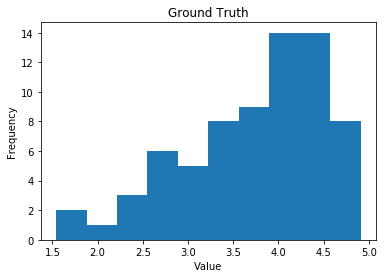

In [57]:
plt.hist(hotelRatingDfGt['avgRatingScore'].as_matrix())
plt.title("Ground Truth")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

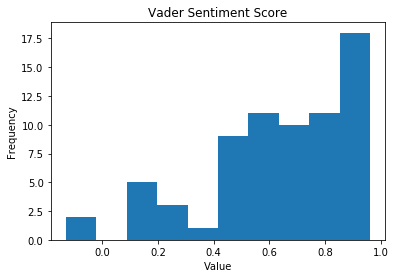

In [58]:
plt.hist(hotelVaderRatingDfGt['avgRatingScore'].as_matrix())
plt.title("Vader Sentiment Score")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

### (5a.a) [ANSWER] Show separate histograms of ground truth and Vader sentiment scores per hotel. Do you notice any interesting differences?

- **Right Skewed => High Ratings**: Overall the distribution of the ground truth ratings and vader sentiment scores are skewed towards the higher ratings. This implies that hotesl in this region overall tend to be rated highly.

### (5a.b) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?

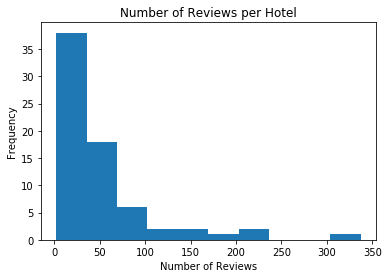

In [182]:
hotelCounts = hotelDf.groupby('hotelName').count()
plt.hist(hotelCounts['reviewColumn'].as_matrix())
plt.title("Number of Reviews per Hotel")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
fig = plt.gcf()

### (5a.b) [ANSWER] Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?

- **Most Hotels recieve roughy 0-50 reviews**: Seeing a mojority of hotels roughly recieving a similar amount of reviews is expected beacsue according to the 80-20 pareto principle we would expect most of the the hostl to hotel reviews to be accountd for by a small amount of the number of reviews. i.e 0-50 account for a majority of the number of review for a hotel.

## (5b) Boxplots
### (5b.a) In two plots, one for ground truth star rating and one for Vader sentiment, show a plotof 5 side-by-side boxplots of these scores.

C:\Anaconda\envs\py35\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


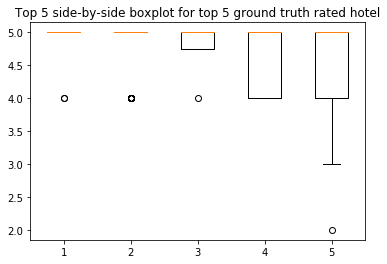

In [183]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].as_matrix()

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[4]]['ratingScore']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.title("Top 5 side-by-side boxplot for top 5 ground truth rated hotel")
plt.show()

In [184]:
tp5gthotel

,hotelName,avgRatingScore
63,Hotel Elan,4.909091
43,Calgary Marriott Downtown Hotel,4.763636
0,Element Calgary Airport,4.750000
58,Residence Inn by Marriott Calgary Airport,4.710526
9,Hotel Le Germain Calgary,4.655963


In [195]:
tp5gtdata = data

C:\Anaconda\envs\py35\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


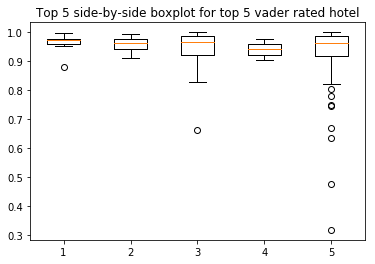

In [62]:
#Plot top 5 side-by-side boxplot for top 5 vader rated hotel
tp5vaderhotel = hotelVaderRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5vaderhotel['hotelName'].as_matrix()

hampton = finaldf.loc[finaldf['hotelName'] == tp5vaderhotel['hotelName'].as_matrix()[0]]['vader']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5vaderhotel['hotelName'].as_matrix()[1]]['vader']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5vaderhotel['hotelName'].as_matrix()[2]]['vader']
homewood = finaldf.loc[finaldf['hotelName'] == tp5vaderhotel['hotelName'].as_matrix()[3]]['vader']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5vaderhotel['hotelName'].as_matrix()[4]]['vader']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.title("Top 5 side-by-side boxplot for top 5 vader rated hotel")
plt.show()

In [63]:
tp5vaderhotel

,hotelName,avgRatingScore
28,Sheraton Cavalier Hotel,0.962738
0,Element Calgary Airport,0.956500
58,Residence Inn by Marriott Calgary Airport,0.943847
57,Wingate by Wyndham Calgary South,0.939400
19,Hotel Blackfoot,0.926029


In [198]:
tp5vaderdata = data

### (5b.b) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

In [64]:
print("Top 5 Ground truth mean & variace")
tp5gthotel

Top 5 Ground truth mean & variace


,hotelName,avgRatingScore
63,Hotel Elan,4.909091
43,Calgary Marriott Downtown Hotel,4.763636
0,Element Calgary Airport,4.750000
58,Residence Inn by Marriott Calgary Airport,4.710526
9,Hotel Le Germain Calgary,4.655963


In [197]:
for hotel in tp5gtdata:
    print ( str(hotel.mean()) + "  " +  str(hotel.var()))   

4.909090909090909  0.08658008658008658
4.763636363636364  0.18383838383838366
4.75  0.25
4.7105263157894735  0.21123755334281635
4.655963302752293  0.33731450555954784


In [200]:
print("Top 5 Vader mean & variace")
tp5vaderhotel

Top 5 Vader mean & variace


,hotelName,avgRatingScore
28,Sheraton Cavalier Hotel,0.962738
0,Element Calgary Airport,0.956500
58,Residence Inn by Marriott Calgary Airport,0.943847
57,Wingate by Wyndham Calgary South,0.939400
19,Hotel Blackfoot,0.926029


In [199]:
for hotel in tp5vaderdata:
    print ( str(hotel.mean()) + "  " +  str(hotel.var()))

4.909090909090909  0.08658008658008658
4.763636363636364  0.18383838383838366
4.75  0.25
4.7105263157894735  0.21123755334281635
4.655963302752293  0.33731450555954784


### (5b.c) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

I find the box plots more inforative because as opposed to just the mean and variance, it provides addiontal information about the distribution on the data, such as lower quartiles and outliers

## (5c) Scatterplots and heatmaps
### (5c.a) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

Text(0.5,0,'Vader Score')

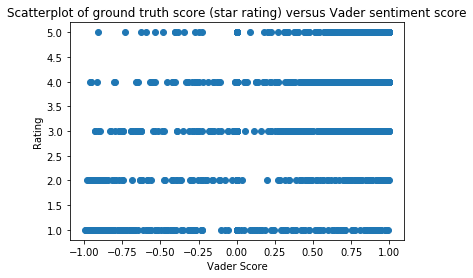

In [66]:
y = finaldf['ratingScore'].as_matrix()
x = finaldf['vader'].as_matrix()
plt.title("Scatterplot of ground truth score (star rating) versus Vader sentiment score")
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [67]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Heatmap of ground truth score (star rating) versus Vader sentiment score


Text(0,0.5,'Rating')

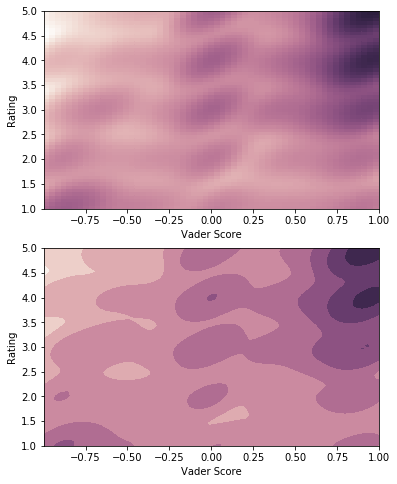

In [68]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
print("Heatmap of ground truth score (star rating) versus Vader sentiment score")
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

### (5c.a) [ANSWER] Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

The scatter plot and heatmap indicate a positive correlation between the vader sentiment score and human rating. The heat map illustrates this more clearly as it shows a more dense region and the top right corner (high vader score and high rating).  

### (5c.b) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends?

Text(0.5,0,'Length of Review')

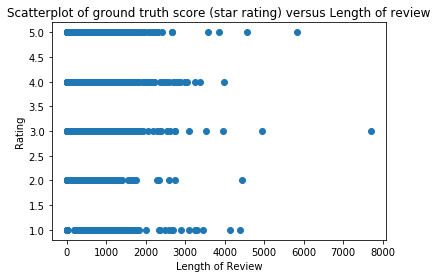

In [69]:
y = finaldf['ratingScore'].as_matrix()
x = finaldf['reviewCol'].str.len().as_matrix()
plt.title("Scatterplot of ground truth score (star rating) versus Length of review")
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of Review')

Text(0,0.5,'Ground Truth Rating')

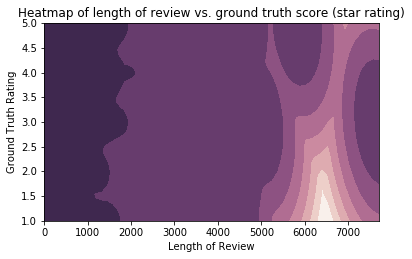

In [70]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
#ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

#ax1.set_xlim(x.min(), x.max())
#ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

#ax1.set_xlabel('Vader Score')
#ax1.set_ylabel('Rating')

plt.title("Heatmap of length of review vs. ground truth score (star rating)")
ax2.set_xlabel('Length of Review')
ax2.set_ylabel('Ground Truth Rating')

Text(0.5,0,'Length of Review')

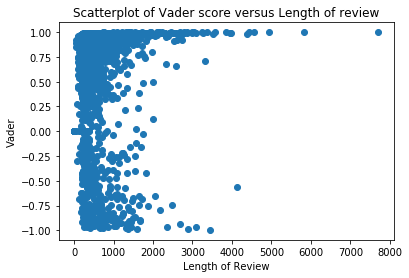

In [72]:
y = finaldf['vader'].as_matrix()
x = finaldf['reviewCol'].str.len().as_matrix()
plt.title("Scatterplot of Vader score versus Length of review")
plt.plot(x, y,"o")
plt.ylabel('Vader')
plt.xlabel('Length of Review')

Text(0,0.5,'Vader Rating')

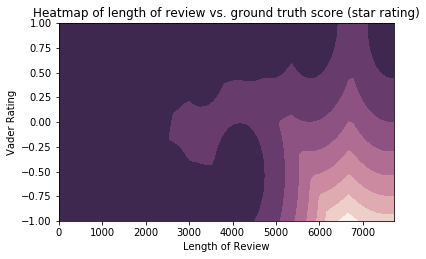

In [73]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
#ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

#ax1.set_xlim(x.min(), x.max())
#ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

#ax1.set_xlabel('Vader Score')
#ax1.set_ylabel('Rating')

plt.title("Heatmap of length of review vs. ground truth score (star rating)")
ax2.set_xlabel('Length of Review')
ax2.set_ylabel('Vader Rating')

### (5c.b) [ANSWER] Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends?

Fromt the heat map, we see a high density in the left region the plot. This does not indicate much. However from the top right of the plot we tell the very lengthy reviews tend to be rated highly both by ground truth and vader rating. 

### (5c.c) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

Text(0.5,0,'Number of Reviews per hotel')

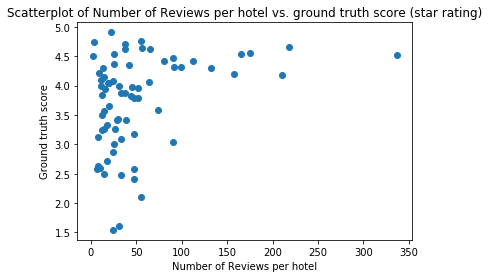

In [74]:
hotelCounts = hotelDf.groupby('hotelName').count()
hotelRatingDfGt.head()
gtHotelCount = pandas.merge(hotelRatingDfGt, hotelCounts, right_index = True, left_on='hotelName')
#gtHotelCount.head()

y = gtHotelCount['avgRatingScore'].as_matrix()
x = gtHotelCount['reviewColumn'].as_matrix()
plt.title("Scatterplot of Number of Reviews per hotel vs. ground truth score (star rating)")
plt.plot(x, y,"o")
plt.ylabel('Ground truth score')
plt.xlabel('Number of Reviews per hotel')


Text(0.5,0,'Number of Reviews per hotel')

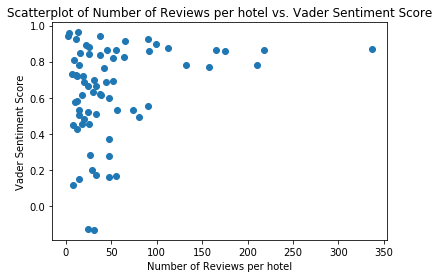

In [75]:
hotelCounts = hotelDf.groupby('hotelName').count()
hotelVaderRatingDfGt.head()
gtHotelCount = pandas.merge(hotelVaderRatingDfGt, hotelCounts, right_index = True, left_on='hotelName')
#gtHotelCount.head()

y = gtHotelCount['avgRatingScore'].as_matrix()
x = gtHotelCount['reviewColumn'].as_matrix()
plt.title("Scatterplot of Number of Reviews per hotel vs. Vader Sentiment Score")
plt.plot(x, y,"o")
plt.ylabel('Vader Sentiment Score')
plt.xlabel('Number of Reviews per hotel')

### (5c.c) [ANSWER] Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

Hotels with a high number of reviews tend to be rated highly both by vader and groun truth.